<a href="https://colab.research.google.com/github/Ay1932/Machine-Learning/blob/main/Heart_dieases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the dataset of Heart attack prediction**

In [18]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/heart_attack_prediction_dataset.csv"
df = pd.read_csv(file_path)
# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

**Check out the missing values in the dataset or which we have to remove**

In [19]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


**Summary Statics**

In [20]:
# Get basic statistics of numerical features
numerical_summary = df.describe()
print("Numerical Summary:\n", numerical_summary)

Numerical Summary:
                Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026            

**Distribution in target varialbles**

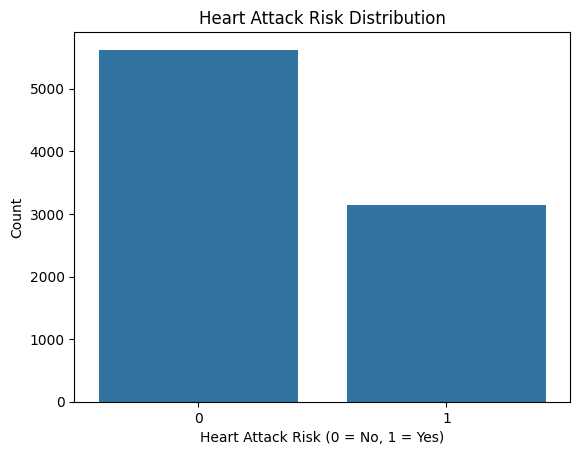

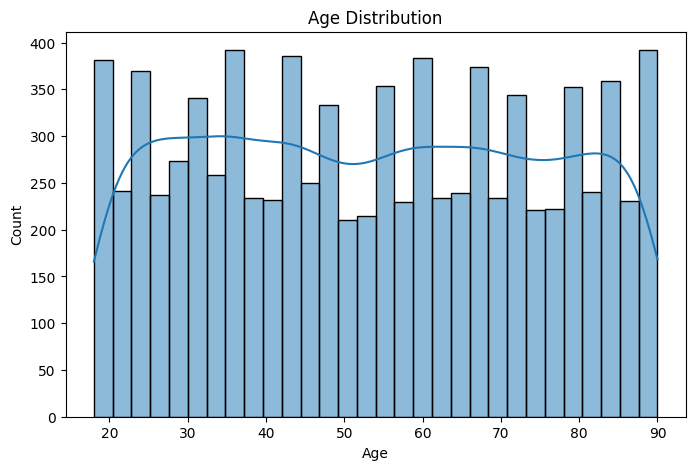

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x=df['Heart Attack Risk'])
plt.title("Heart Attack Risk Distribution")
plt.xlabel("Heart Attack Risk (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


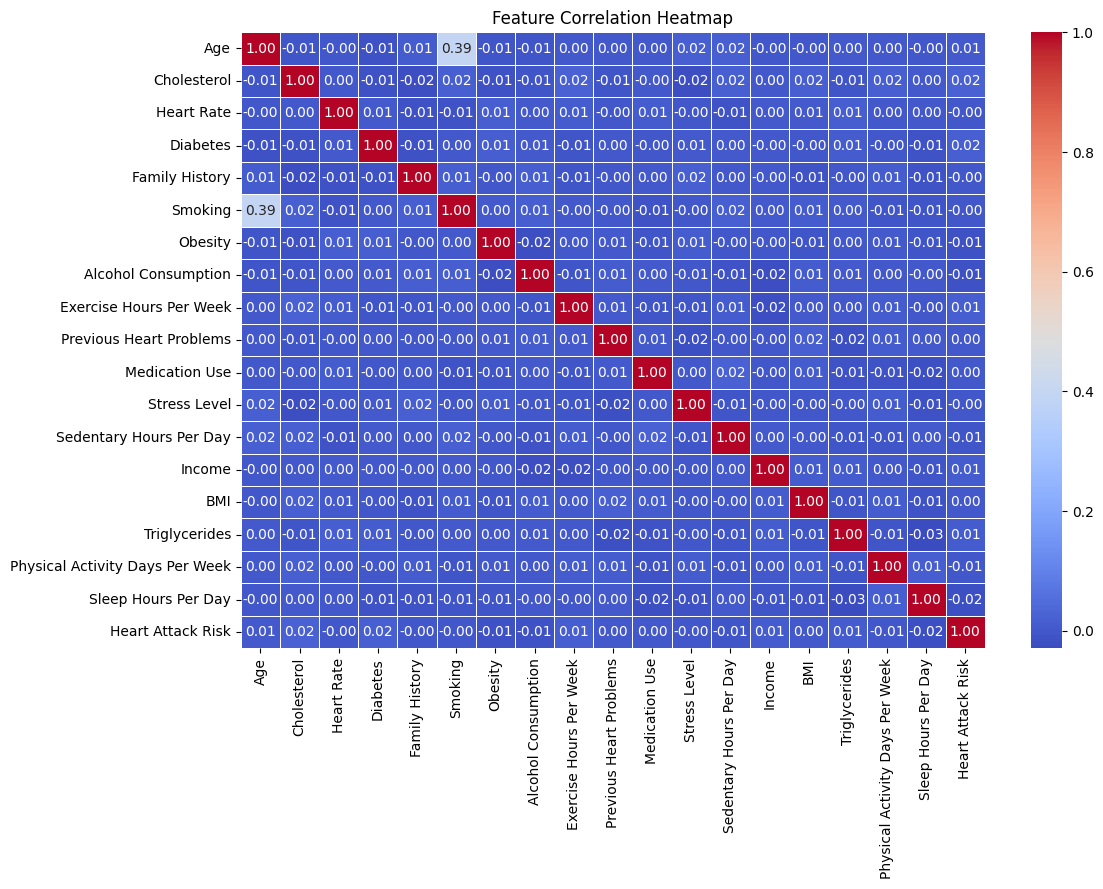

In [24]:
import numpy as np

plt.figure(figsize=(12, 8))
# Exclude non-numeric columns, like 'Patient ID', before calculating correlation
numerical_df = df.select_dtypes(include=np.number)  # Select only numerical columns
corr_matrix = numerical_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Important features for outliner**

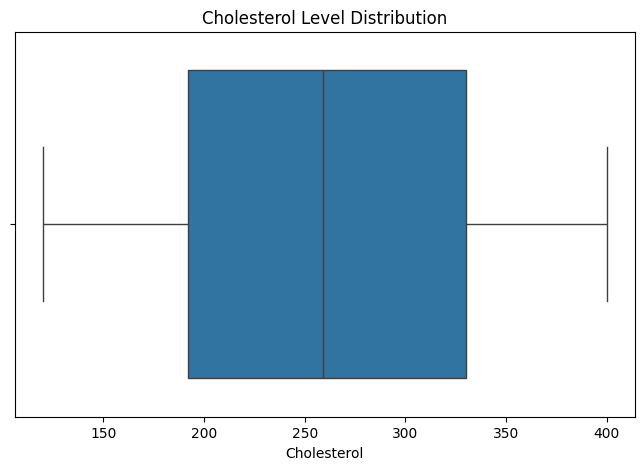

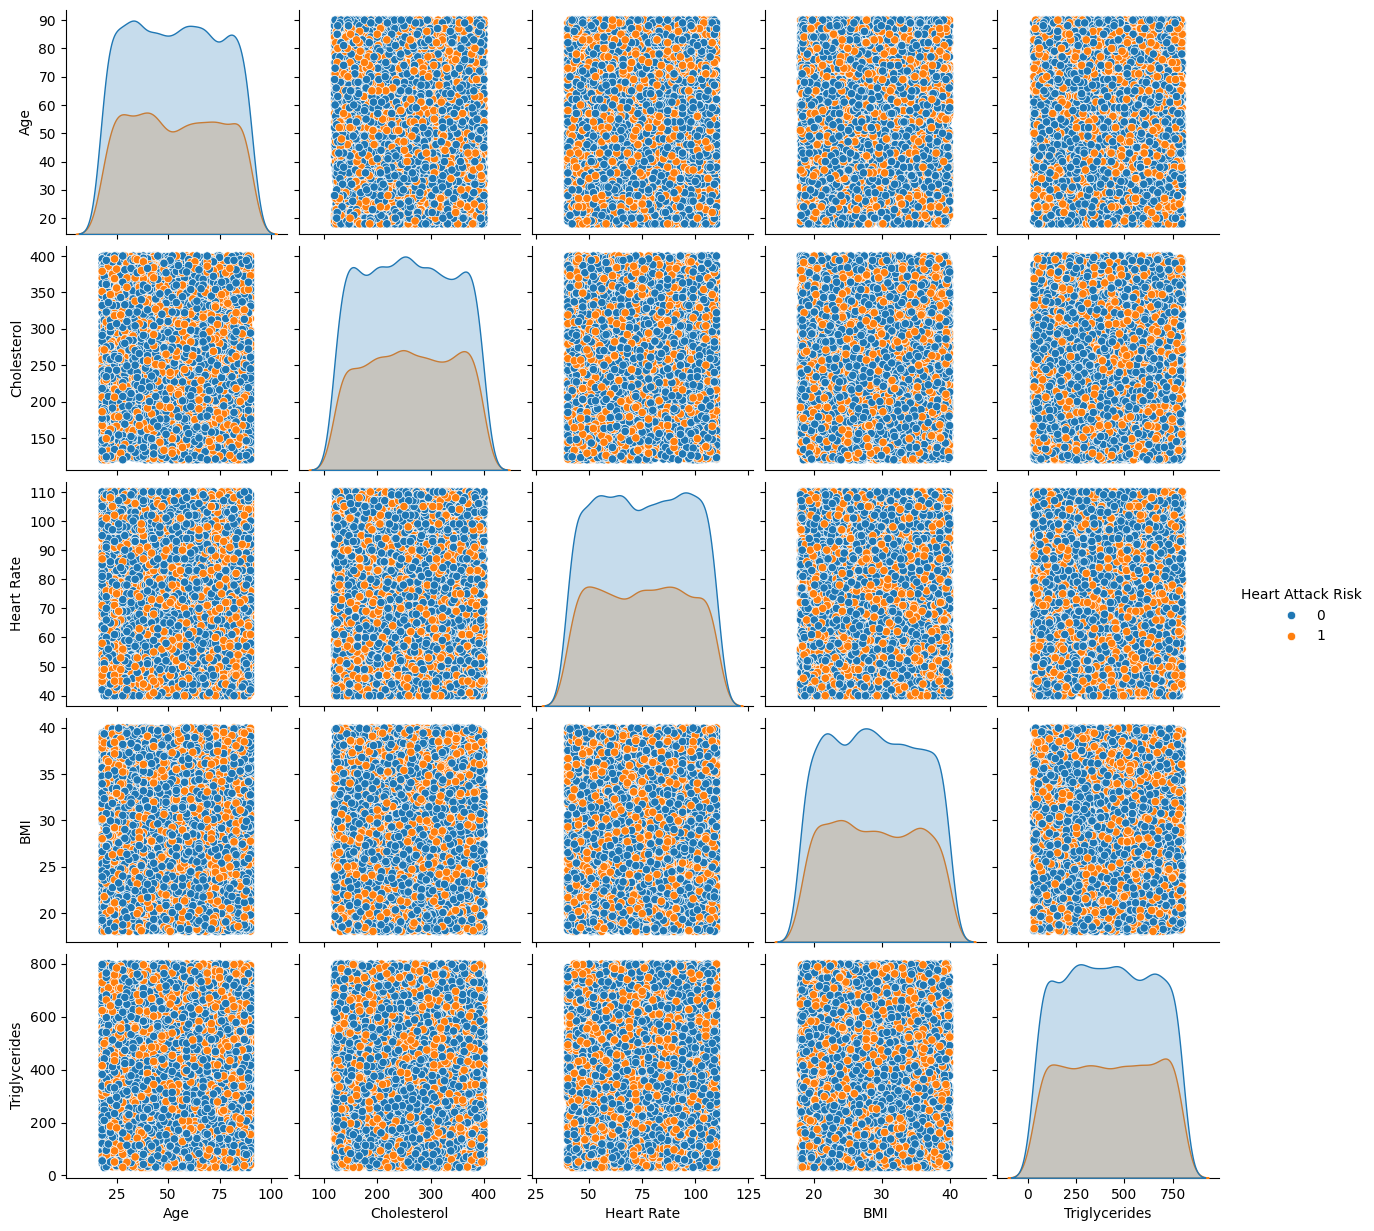

In [26]:
# Boxplot for Cholesterol levels
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Cholesterol'])
plt.title("Cholesterol Level Distribution")
plt.show()

# Pairplot for selected features
sns.pairplot(df[['Age', 'Cholesterol', 'Heart Rate', 'BMI', 'Triglycerides', 'Heart Attack Risk']], hue='Heart Attack Risk')
plt.show()


**Convert categorical features into numerical form**

In [27]:
# Convert 'Sex' to numerical (Male: 1, Female: 0)
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

# Convert 'Diet' to numerical categories
df['Diet'] = df['Diet'].astype('category').cat.codes  # Assigns unique integer codes to each diet type

# Display updated DataFrame
print(df[['Sex', 'Diet']].head())


   Sex  Diet
0    1     0
1    1     2
2    0     1
3    1     0
4    1     2


In [28]:
# Split "Blood Pressure" into Systolic and Diastolic
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Drop the original "Blood Pressure" column
df.drop(columns=['Blood Pressure'], inplace=True)

# Display updated DataFrame
print(df[['Systolic BP', 'Diastolic BP']].head())


   Systolic BP  Diastolic BP
0          158            88
1          165            93
2          174            99
3          163           100
4           91            88


**Delete or drop corelevant columns**

In [29]:
# Drop unnecessary columns
df.drop(columns=['Patient ID', 'Country', 'Continent', 'Hemisphere'], inplace=True)

# Display remaining columns
print("Remaining columns:", df.columns)

Remaining columns: Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Systolic BP', 'Diastolic BP'],
      dtype='object')


**Checking imbalance in Heart Attack Risk**

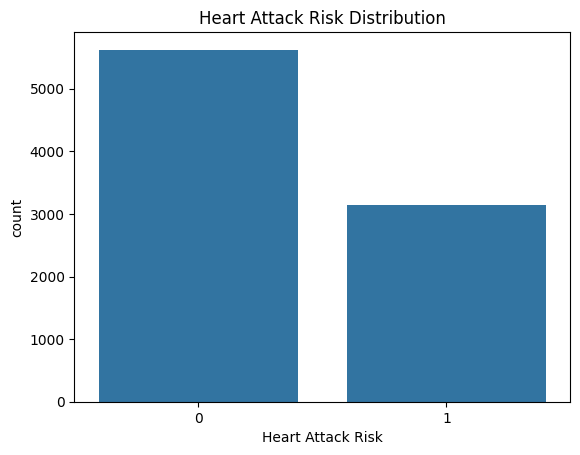

Heart Attack Risk
0    0.641789
1    0.358211
Name: proportion, dtype: float64


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the target variable
sns.countplot(x=df['Heart Attack Risk'])
plt.title("Heart Attack Risk Distribution")
plt.show()

# Display class distribution
print(df['Heart Attack Risk'].value_counts(normalize=True))